In [1]:
using DifferentialEquations, Plots

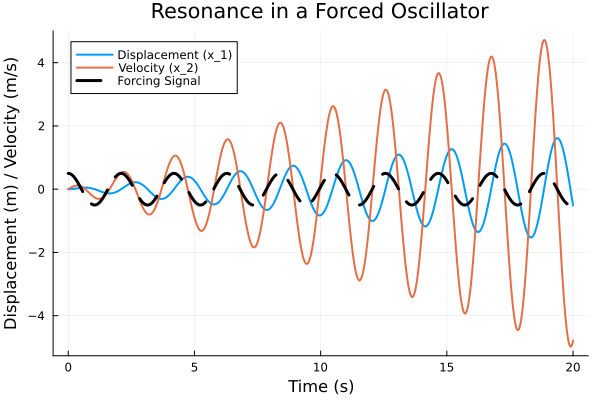

In [ ]:
# Constants
m = 1.0   # Mass (kg)
k = 9.0   # Spring constant (N/m)
F0 = 0.5  # Amplitude of the external force (N)
w_n = sqrt(k / m)  # Natural frequency (rad/s)
w = w_n   # Forcing frequency = Natural frequency for resonance

# ODE Definition
function forced_oscillator!(du, u, p, t)
    x, v = u
    du[1] = v
    du[2] = (F0*cos(w*t) - k*x) / m
end

# Initial conditions
u0 = [0.0, 0.0]  # Initial displacement and velocity
tspan = (0.0, 20.0)  # Time span

# Solve the ODE
prob = ODEProblem(forced_oscillator!, u0, tspan)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

# Create a finer time grid for interpolation
fine_t = range(tspan[1], tspan[2], length=10000) # Increased number of points for finer interpolation

# Interpolate the solution at the finer time grid
fine_x = [sol(t)[1] for t in fine_t]
fine_v = [sol(t)[2] for t in fine_t]

# Forcing signal
forcing_signal = F0*cos.(w.*fine_t)

# Plotting
p1 = plot(fine_t, fine_x, label="Displacement (x_1)", xlabel="Time (s)", ylabel="Displacement (m) / Velocity (m/s)", 
    title="Resonance in a Forced Oscillator", linewidth=2)
plot!(fine_t, fine_v, label="Velocity (x_2)", linewidth=2) # Smooth velocity curve
plot!(fine_t, forcing_signal, label="Forcing Signal", linestyle=:dash, color=:black, lw=3) # Forcing signal

# Display the plot
plot!(legend=:topleft)